In [1]:
import os
import pydicom
from pydicom.data import get_testdata_files

## NOTE
If we copy the file to this directory:

C:\Users\USER\Anaconda3\Lib\site-packages\pydicom\data\test_files
        
It works directly, I will be fixing that later today to allow us work from any file

Automatically created module for IPython interactive environment

Filename.........: C:\Users\USER\Anaconda3\lib\site-packages\pydicom\data\test_files\000000.dcm
Storage type.....: 1.2.840.10008.5.1.4.1.1.2

Patient's name...:  , 
Patient id.......: LIDC-IDRI-0001
Modality.........: CT
Study Date.......: 20000101
Image size.......: 512 x 512, 524288 bytes
Pixel spacing....: ['0.703125', '0.703125']
Slice location...: -207.500000


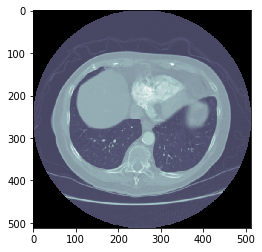

In [12]:
import matplotlib.pyplot as plt
import pydicom
from pydicom.data import get_testdata_files

print(__doc__)

filename = get_testdata_files('000000.dcm')[0]
dataset = pydicom.dcmread(filename)

# Normal mode:
print()
print("Filename.........:", filename)
print("Storage type.....:", dataset.SOPClassUID)
print()

pat_name = dataset.PatientName
display_name = pat_name.family_name + ", " + pat_name.given_name
print("Patient's name...:", display_name)
print("Patient id.......:", dataset.PatientID)
print("Modality.........:", dataset.Modality)
print("Study Date.......:", dataset.StudyDate)

if 'PixelData' in dataset:
    rows = int(dataset.Rows)
    cols = int(dataset.Columns)
    print("Image size.......: {rows:d} x {cols:d}, {size:d} bytes".format(
        rows=rows, cols=cols, size=len(dataset.PixelData)))
    if 'PixelSpacing' in dataset:
        print("Pixel spacing....:", dataset.PixelSpacing)

# use .get() if not sure the item exists, and want a default value if missing
print("Slice location...:", dataset.get('SliceLocation', "(missing)"))

# plot the image using matplotlib
plt.imshow(dataset.pixel_array, cmap=plt.cm.bone)
plt.show()

## Read Directory

In [5]:
from os.path import dirname, join
from pprint import pprint

import pydicom
from pydicom.data import get_testdata_files
from pydicom.filereader import read_dicomdir

# fetch the path to the test data
filepath = get_testdata_files('DICOMDIR')[0]
print('Path to the DICOM directory: {}'.format(filepath))
# load the data
dicom_dir = read_dicomdir(filepath)
base_dir = dirname(filepath)

# go through the patient record and print information
for patient_record in dicom_dir.patient_records:
    if (hasattr(patient_record, 'PatientID') and
            hasattr(patient_record, 'PatientName')):
        print("Patient: {}: {}".format(patient_record.PatientID,
                                       patient_record.PatientName))
    studies = patient_record.children
    # got through each serie
    for study in studies:
        print(" " * 4 + "Study {}: {}: {}".format(study.StudyID,
                                                  study.StudyDate,
                                                  study.StudyDescription))
        all_series = study.children
        # go through each serie
        for series in all_series:
            image_count = len(series.children)
            plural = ('', 's')[image_count > 1]

            # Write basic series info and image count

            # Put N/A in if no Series Description
            if 'SeriesDescription' not in series:
                series.SeriesDescription = "N/A"
            print(" " * 8 + "Series {}: {}: {} ({} image{})".format(
                series.SeriesNumber, series.Modality, series.SeriesDescription,
                image_count, plural))

            # Open and read something from each image, for demonstration
            # purposes. For simple quick overview of DICOMDIR, leave the
            # following out
            print(" " * 12 + "Reading images...")
            image_records = series.children
            image_filenames = [join(base_dir, *image_rec.ReferencedFileID)
                               for image_rec in image_records]

            datasets = [pydicom.dcmread(image_filename)
                        for image_filename in image_filenames]

            patient_names = set(ds.PatientName for ds in datasets)
            patient_IDs = set(ds.PatientID for ds in datasets)

            # List the image filenames
            print("\n" + " " * 12 + "Image filenames:")
            print(" " * 12, end=' ')
            pprint(image_filenames, indent=12)

            # Expect all images to have same patient name, id
            # Show the set of all names, IDs found (should each have one)
            print(" " * 12 + "Patient Names in images..: {}".format(
                patient_names))
            print(" " * 12 + "Patient IDs in images..: {}".format(
                patient_IDs))

Path to the DICOM directory: C:\Users\USER\Anaconda3\lib\site-packages\pydicom\data\test_files\dicomdirtests\DICOMDIR
Patient: 77654033: Doe^Archibald
    Study 2: 20010101: XR C Spine Comp Min 4 Views
        Series 1: CR: N/A (1 image)
            Reading images...

            Image filenames:
             [           'C:\\Users\\USER\\Anaconda3\\lib\\site-packages\\pydicom\\data\\test_files\\dicomdirtests\\77654033\\CR1\\6154']
            Patient Names in images..: {'Doe^Archibald'}
            Patient IDs in images..: {'77654033'}
        Series 2: CR: N/A (1 image)
            Reading images...

            Image filenames:
             [           'C:\\Users\\USER\\Anaconda3\\lib\\site-packages\\pydicom\\data\\test_files\\dicomdirtests\\77654033\\CR2\\6247']
            Patient Names in images..: {'Doe^Archibald'}
            Patient IDs in images..: {'77654033'}
        Series 3: CR: N/A (1 image)
            Reading images...

            Image filenames:
             [      